# High Frequency Words

The dataset being worked with is from [Kaggle](https://www.kaggle.com/datasets/pdunton/marvel-cinematic-universe-dialogue?select=mcu_subset.csv) utilizing the scripts from various Marvel Cinematic Universe films.

[Explanation](https://www.youtube.com/)

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords

### 1. Choose a corpus of interest.

We will be working with Marvel Cinematic Universe film scripts

In [2]:
df = pd.read_csv("mcu.csv")
df = df.drop(df.columns[0], axis=1)

Here are the scripts available, and we notice that it does not include every film made in this universe. Because of this, lets focus on a specific character's set of movies. In this case it will be Captain America.

In [3]:
df['movie'].drop_duplicates().reset_index().drop(columns=['index']).sort_values('movie')

,movie
9,Ant-Man
8,Avengers: Age of Ultron
17,Avengers: Endgame
15,Avengers: Infinity War
14,Black Panther
10,Captain America: Civil War
3,Captain America: The First Avenger
7,Captain America: The Winter Soldier
16,Captain Marvel
11,Guardians of the Galaxy Vol. 2


In [4]:
capt_america_df = df[df['movie'].str.contains('Captain America')]

In [5]:
capt_america_df['movie'].drop_duplicates()

2520     Captain America: The First Avenger
5845    Captain America: The Winter Soldier
8441             Captain America: Civil War
Name: movie, dtype: object

In [6]:
capt_america_df['line'].head()

2520                    Are you the guys from Washington?
2521                You get many other visitors out here?
2522                      How long have you been on site?
2523    Since this morning. A Russian oil team called ...
2524                   How come nobody spotted it before?
Name: line, dtype: object

#### Create Corpus and Tokenize

We then took all the actor's lines in the scripts and condensed it into one single corpus text. 

In [7]:
corpus_txt = capt_america_df['line'].str.cat(sep=' ')

In [8]:
def custom_tokenize(text):
    pattern = r"\b\w+(?:['’]\w+)?\b|[.,!?;]"
    return re.findall(pattern, text)

tokens = custom_tokenize(corpus_txt)
tokens[:10]

['Are', 'you', 'the', 'guys', 'from', 'Washington', '?', 'You', 'get', 'many']

### 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).


When we break down our corpus and into a frequency distribution and total up the unique words we find that we have roughly 4.5K unique words. However, at a closer look, we quickly notice that the word count is including punctuation such as **'?'** and **'.'** and also common words such as **'the'** and **'a'**. 

In [9]:
freq_dist = FreqDist(tokens)
freq_dist

FreqDist({'.': 4026, ',': 1532, 'the': 808, '?': 761, 'I': 733, 'you': 719, 'to': 597, 'a': 554, '!': 390, 'of': 327, ...})

In [10]:
len(freq_dist)

4496

Looking at a chart we see the Top 5 most frequent unique words includes the issues previously mentioned. 

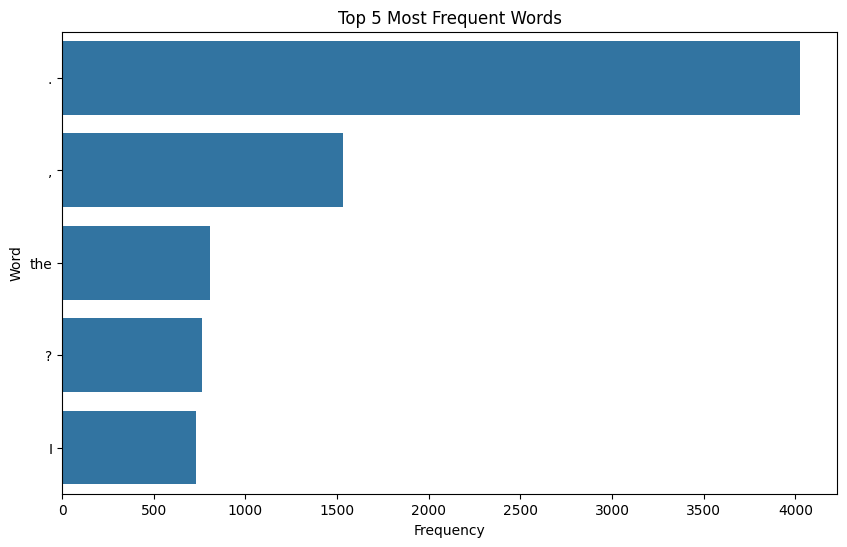

In [11]:
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency'])

freq_df = freq_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=freq_df.head(5))
plt.title("Top 5 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

#### Removing Stopwords

We will now remove these common words, also called stopwords, and puntuation from the text. This will help us define a better approach of unique words within the corpus. 

We find that we now have roughly 4.2K unique words in our corpus.

In [12]:
stop_words = set(stopwords.words("english"))

def custom_tokenize(text):
    pattern = r"\b\w+(?:['’]\w+)?\b"
    return [word for word in re.findall(pattern, text) if word.lower() not in stop_words]

tokens = custom_tokenize(corpus_txt)

freq_dist = FreqDist(tokens)
freq_dist

FreqDist({'know': 187, "I'm": 152, 'one': 96, 'gonna': 82, 'get': 77, 'got': 77, 'like': 76, 'think': 72, 'Yeah': 70, 'go': 67, ...})

In [13]:
len(freq_dist)

4244

Looking at the Top 5 unique words now, we see that words such as **'know'** and **'got'** are moved up the list. 

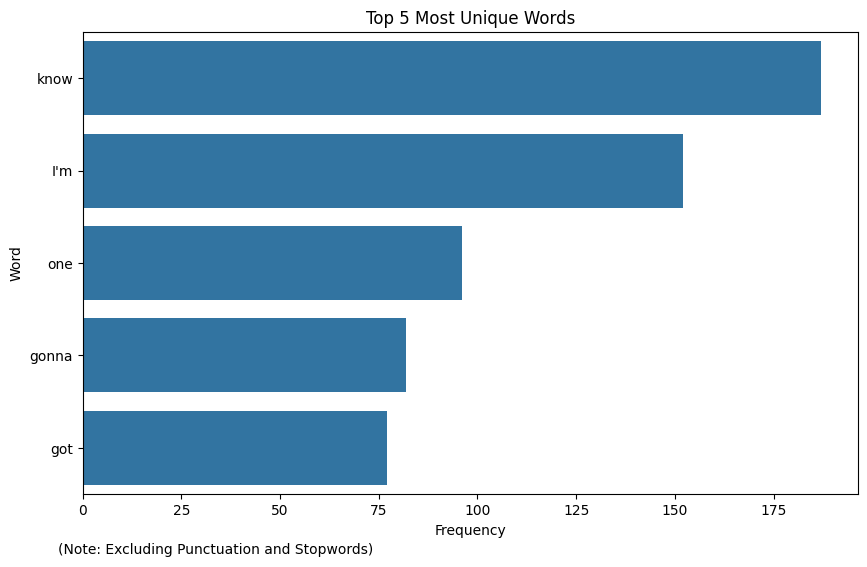

In [14]:
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency'])

freq_df = freq_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=freq_df.head(5))
plt.title("Top 5 Most Unique Words")
plt.figtext(0.1, 0.01, "(Note: Excluding Punctuation and Stopwords)")
plt.xlabel("Frequency")
plt.show()

### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [15]:
def count_words(text, freq_words):
    
    cumulative_freq = 0
    unique_words_half = list()
    unique_words_count = 0
    total_words = sum(freq_dist.values())
    sort_freq_words = freq_words.most_common()

    for word, freq in sort_freq_words:
        cumulative_freq += freq
        unique_words_half.append(word)
        unique_words_count += 1
        
        if cumulative_freq >= total_words / 2:
            break
    return cumulative_freq, unique_words_half, unique_words_count, total_words

sum_freq, freq_words, freq_count, total_words = count_words(freq_dist, freq_dist)

print(f"There are a total of {total_words:,d} words in our corpus.")
print(f"Half of the total words represented by {freq_count:,d} unique words.")

There are a total of 13,672 words in our corpus.
Half of the total words represented by 370 unique words.


### 4. Identify the 200 highest frequency words in this corpus.

In [16]:
freq_df.head(200)

,Word,Frequency
30,know,187
1779,I'm,152
44,one,96
42,gonna,82
25,got,77
...,...,...
1251,use,12
408,Maybe,12
611,guess,12
8,morning,12


### 5. Create a graph that shows the relative frequency of these 200 words.

We see that as we plot our frequency graph, we end up with an exponential decaying distribution starting with high values, that goes sharply down as we approach zero.

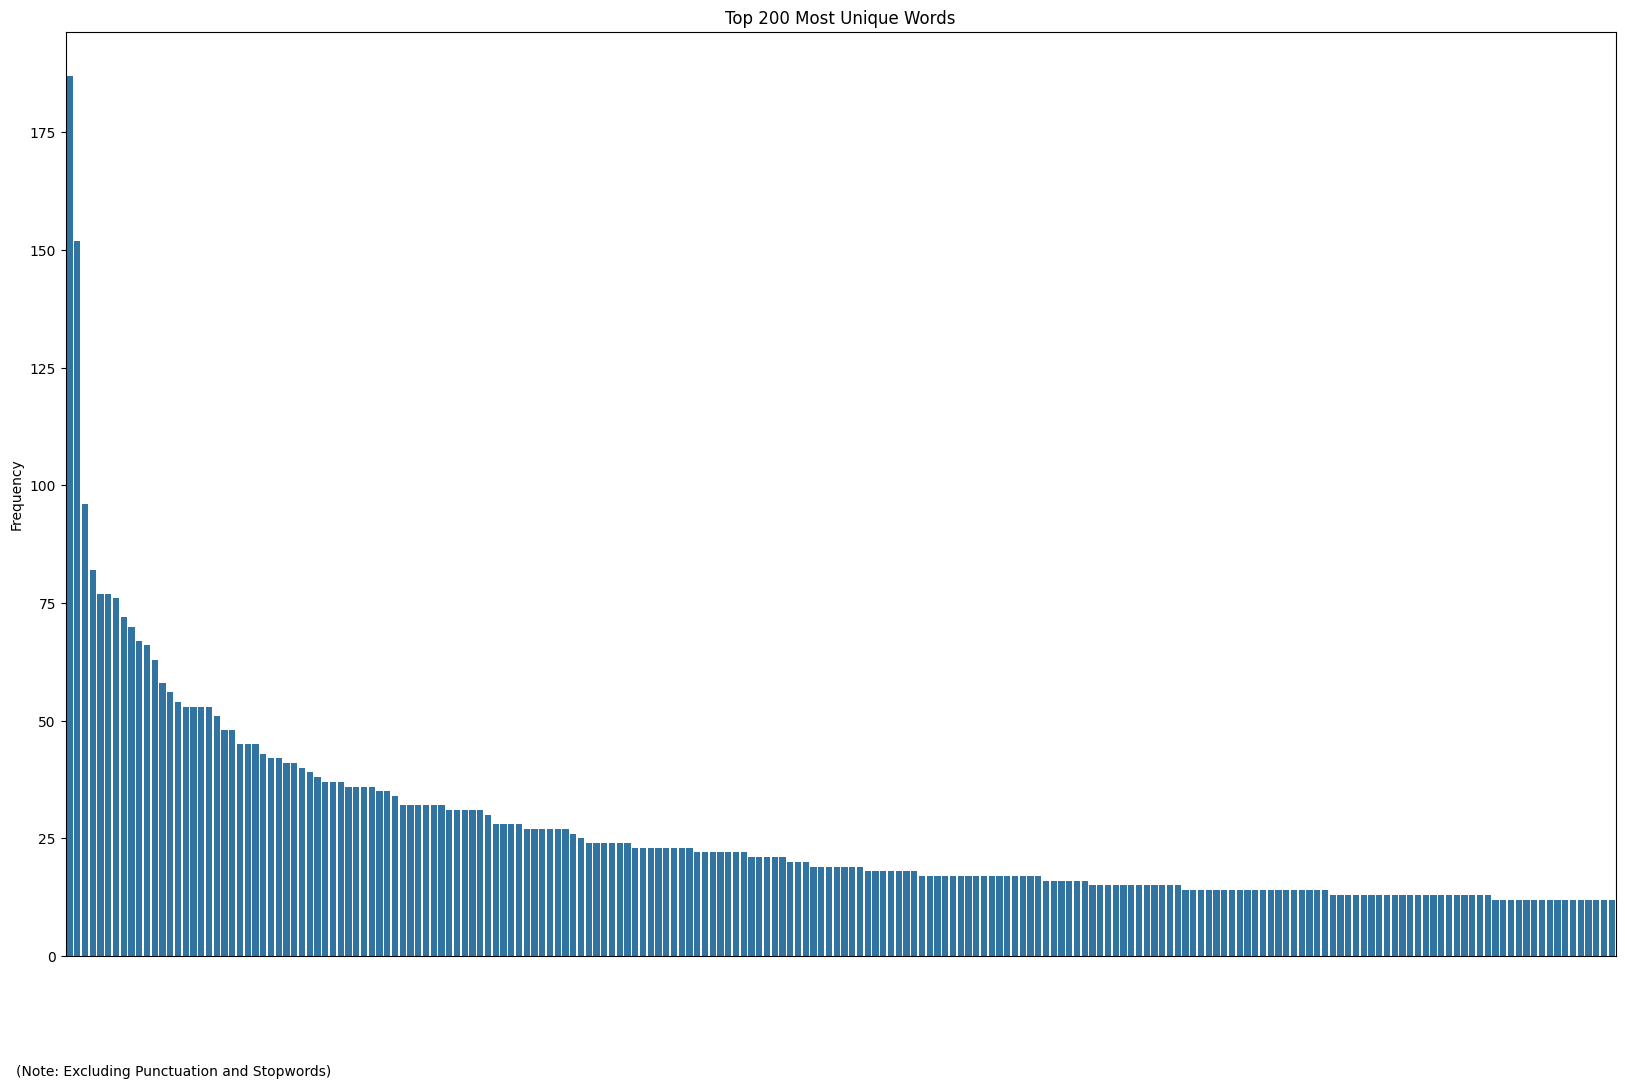

In [17]:
# Convert frequency distribution to a DataFrame
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency'])

# Sort by frequency
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Visualize using Seaborn
plt.figure(figsize=(20, 12))
ax = sns.barplot(x='Word', y='Frequency', data=freq_df.head(200))
plt.title("Top 200 Most Unique Words")
plt.figtext(0.1, 0.01, "(Note: Excluding Punctuation and Stopwords)")
plt.xticks([])
plt.xlabel("")
plt.show()

### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Our previous graph confirms that we do follow Zipf's Law, which the frequency of a word in a language is inversely proportional to its rank in the frequency table. One way we can confirm this better is if we log-scale these values, we should end up with a straight line, we a negative slope.

In our graph, we see that we have a relatively straight line. There is some  curvature, but not siginificant enough that it deviates far from our reference line 

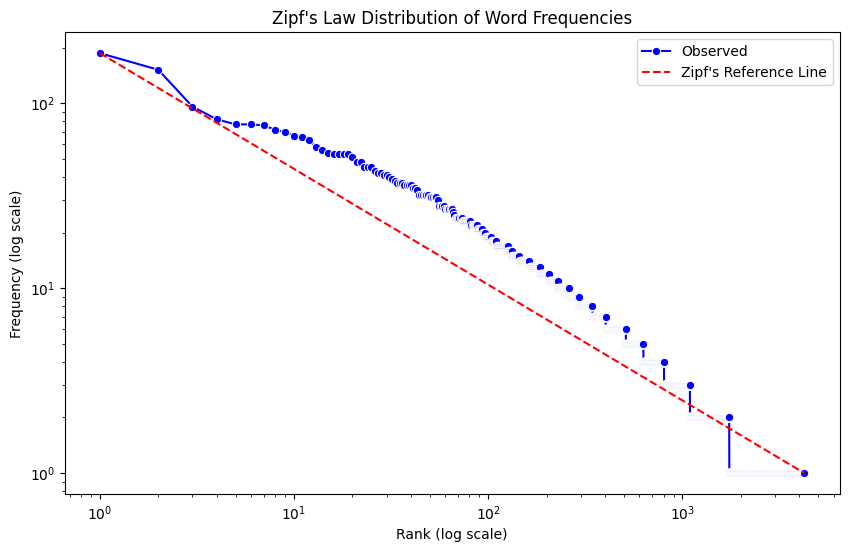

In [18]:
freq_df['Rank'] = freq_df['Frequency'].rank(method='first', ascending=False)

x_min, x_max = freq_df['Rank'].min(), freq_df['Rank'].max()
y_max, y_min = freq_df['Frequency'].max(), 1  

plt.figure(figsize=(10, 6))
sns.lineplot(x='Rank', y='Frequency', data=freq_df, marker='o', color='b', label="Observed")

plt.plot([x_min, x_max], [y_max, y_min], linestyle="--", color="r", label="Zipf's Reference Line")

plt.xscale('log')
plt.yscale('log')

plt.title("Zipf's Law Distribution of Word Frequencies")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.show()



### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Our courpus can differ vastly from all the words in all corpora. This is because of a variety of factors such as:

- **Cutural/Geographical Differences**
    - Our movies are quite a small subset of all movie genres, let alone different types of work across the world. This means we are missing words like slang or phrases that are commonly said within certain communities.
- **Genres of Text**
    - When we look at corpus text, the writing structure can be different where academic research corpus are more rigid and structured with possible scientific phrases and domain knowledge as opposed to works such as poetry or Shakespearean books. Furthermore, corpus can also include simple things such as reviews for a product that are more opinionated with verbiage such as love, hate and avoid.